In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pandas as pd
import numpy as np
import matplotlib

In [9]:
df = pd.read_csv('states.csv')
print(df.head())

           State  rank density/mi2  density/km2  pop_rank   2015_pop  \
0     New Jersey     1       1,218          470        11  8,958,013   
1   Rhode Island     2       1,021          394        43  1,056,298   
2  Massachusetts     3         871          336        15  6,794,422   
3    Connecticut     4         741          286        29  3,590,886   
4       Maryland     5         618          238        19  6,006,401   

   land_rank area_mi2   area_km2  
0         46    7,354  19,046.80  
1         50    1,034   2,678.00  
2         45    7,800  20,201.90  
3         48    4,842  12,540.70  
4         42    9,707  25,141.00  


In [16]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

max 1218.0
min 1.0
range 1217.0


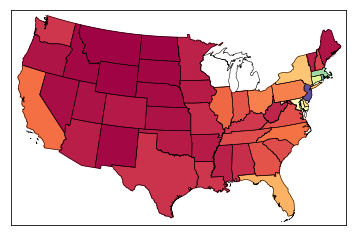

In [17]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

map.readshapefile('st99_d00', name='states', drawbounds=True)

ax = plt.gca()

state_names = []
for shape_dict in map.states_info:
    state_name = shape_dict['NAME']
    state_names.append(state_name)
    #print(state_name)
#print(state_names)



max_density = -1.0
min_density = -1.0
for index, row in df.iterrows():
    d = row['density/mi2']
    density = float(d.replace(',' , ''))
    if (max_density==-1.0) or (max_density<density):
        max_density = density
    if (min_density==-1.0) or (min_density>density):
        min_density = density
print('max',max_density)
print('min',min_density)
range_density = max_density - min_density
print('range',range_density)

# we pick a color for the state density out of red spectrum
cmap = matplotlib.cm.get_cmap('Spectral')

# for each state get the color for it's density
for index, row in df.iterrows():
    state_name = row['State']
    #print('Looking for state ', state_name)
    d = row['density/mi2']
    density = float(d.replace(',' , ''))
    color = cmap((density - min_density)/range_density)
    #print state_name, d, density, color
    seg = map.states[state_names.index(state_name)]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

plt.show()